In [18]:
# Python Project Template
# 1. Prepare Problem
# 	a) Load libraries
# 	b) Load dataset
# 2. Summarize Data
# 	a) Descriptive statistics
# 	b) Data visualizations
# 3. Prepare Data
# 	a) Data Cleaning
# 	b) Feature Selection
# 	c) Data Transforms
# 4. Evaluate Algorithms
# 	a) Split-out validation dataset
# 	b) Test options and evaluation metric
# 	c) Spot Check Algorithms
# 	d) Compare Algorithms
# 5. Improve Accuracy
# 	a) Algorithm Tuning
# 	b) Ensembles
# 6. Finalize Model
# 	a) Predictions on validation dataset
# 	b) Create standalone model on entire training dataset
# 	c) Save model for later use

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 1})
sns.set_style('whitegrid', {'axes.grid': False})
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

In [4]:
train_df=pd.read_csv('data/train.csv',index_col=0)
test_df=pd.read_csv('data/test.csv')
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [6]:
train_df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
train_df.shape

(614, 12)

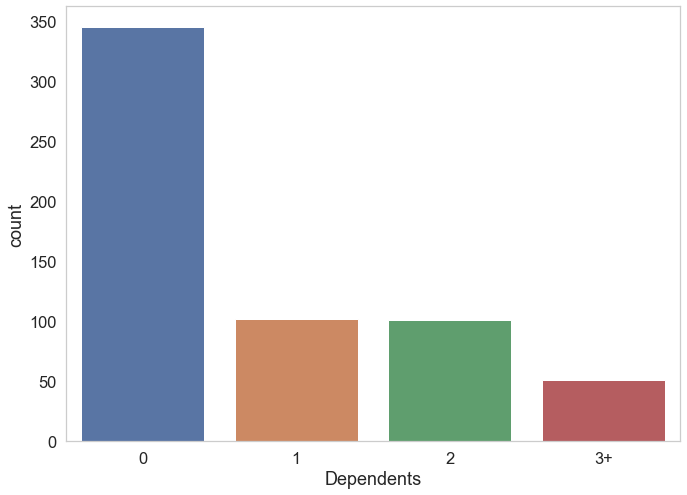

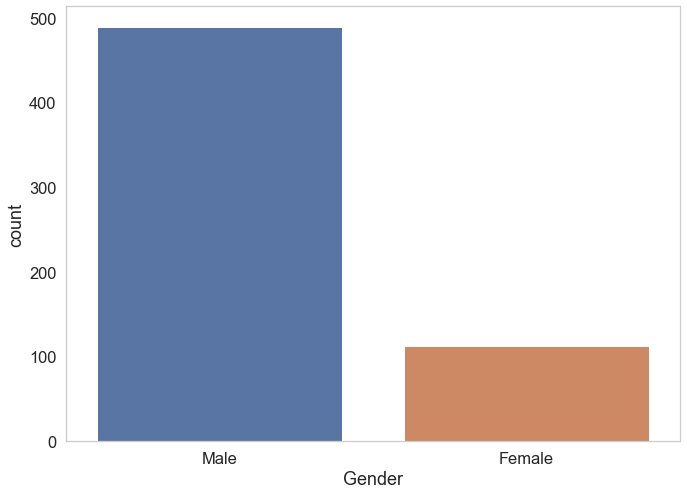

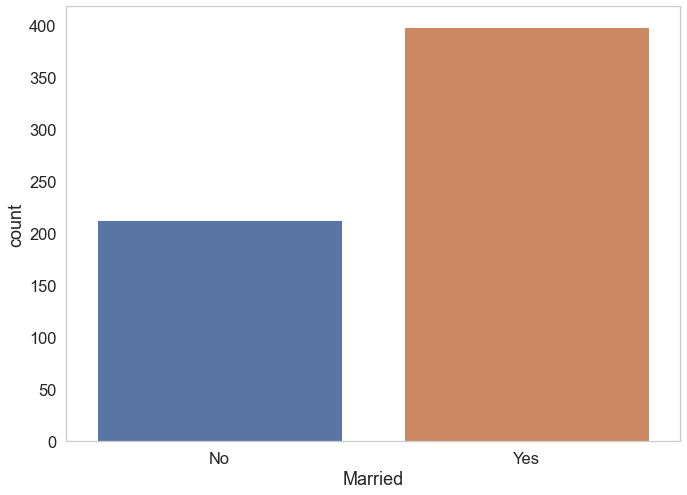

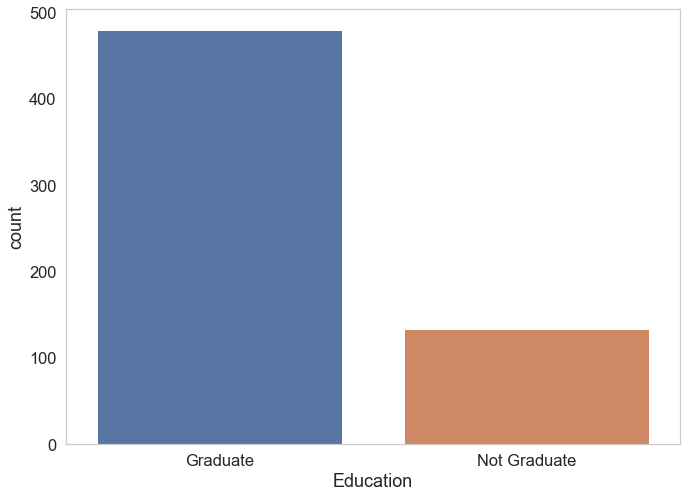

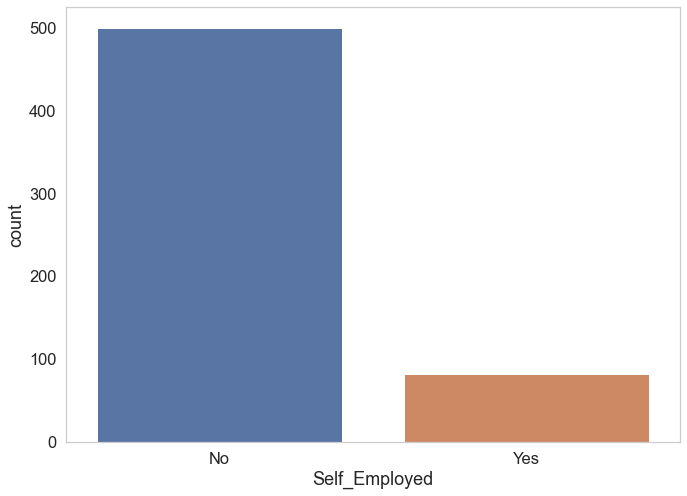

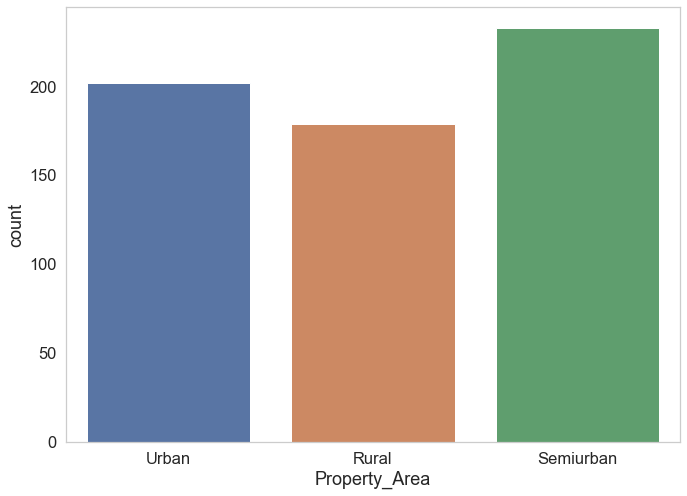

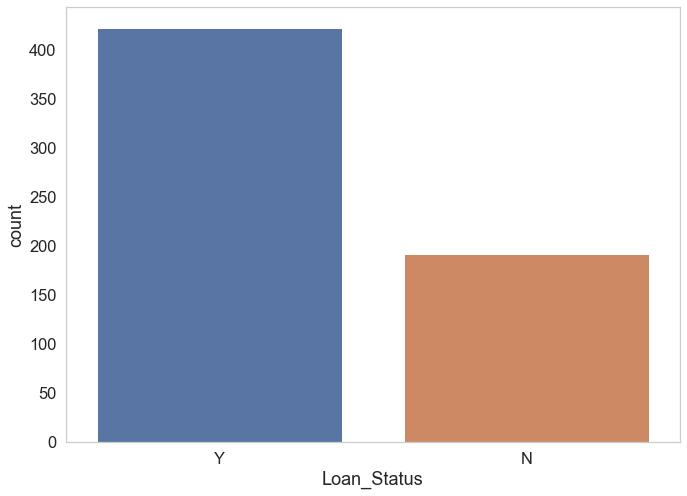

In [8]:
cat_cols=['Dependents','Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
for col in cat_cols:
    sns.countplot(train_df[col])
    plt.show()

In [9]:
train_df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Data is imbalanced

In [10]:
num_cols=[]
for col in train_df.columns:
    if col not in cat_cols:
        num_cols.append(col)

In [11]:
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

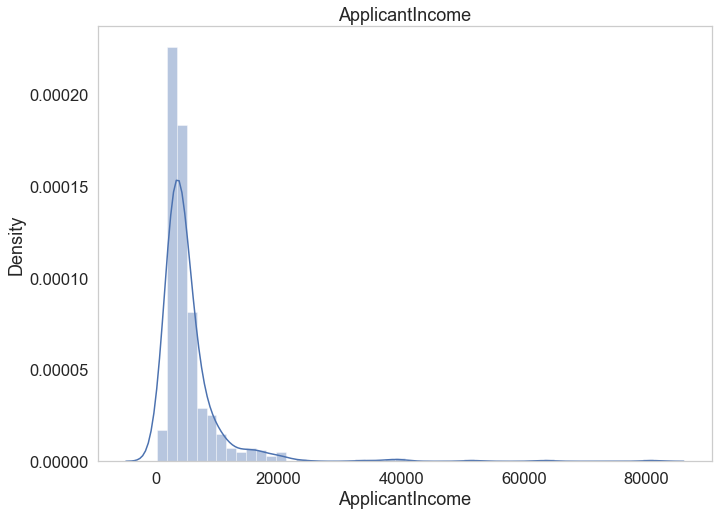

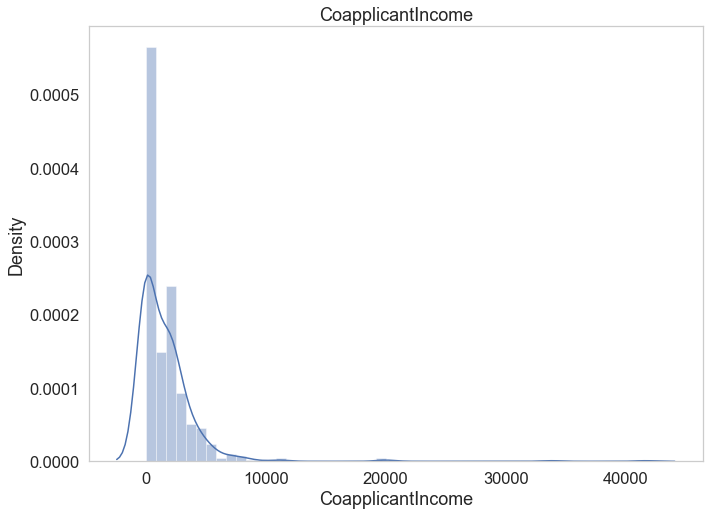

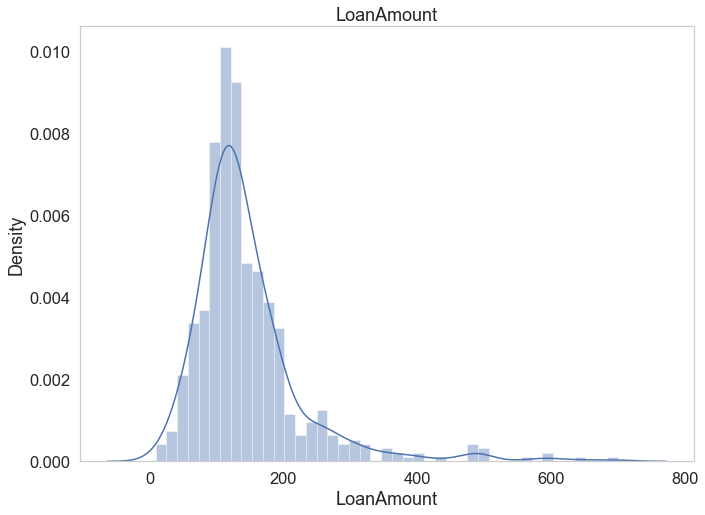

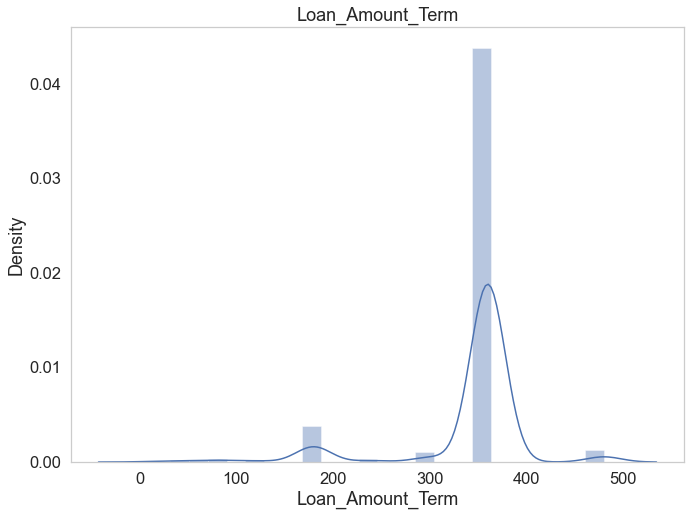

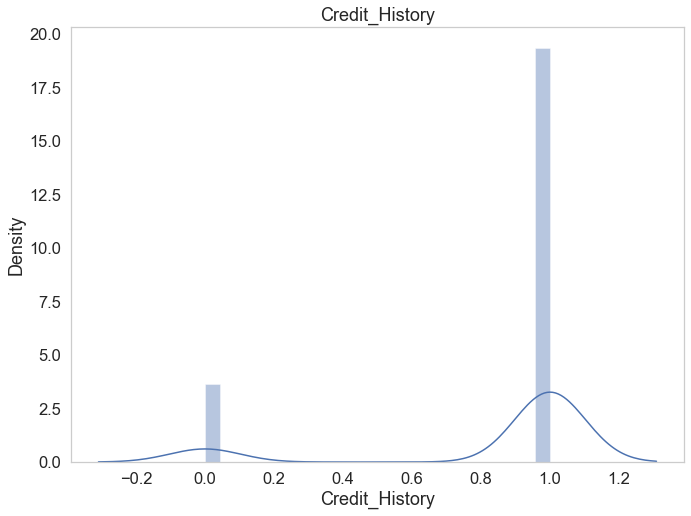

In [12]:
for col in num_cols:
    sns.distplot(train_df[col])
    plt.title(f'{col}')
    plt.show()

Some data is skewed

In [14]:
test_df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [16]:
submission_1=test_df['Loan_ID']
submission_1['Loan_Status']='Y'

In [17]:
submission_1.to_csv('submissions\submission_1.csv',index=False)

70 percent accuracy

In [19]:
train_df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [20]:
no_na=train_df.dropna()
no_na.shape

(480, 12)

In [21]:
print(num_cols)
print(cat_cols)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
['Dependents', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
